# Business Startups: The Keys to Success

## 1. Background

Creating a new business is a difficult process, there is no doubt about it. According to the Startup Genome's 2019 report it is claimed that 11 out of 12 new startups fail. On top of that about 7 of 10 venture-backed startups fail, and 2 out of 10 new buisinesses fail in the first year of operations according to the Bureau of Labor. The other side of that coin? 1 out of 12 succeed, now that's what we want to learn about. Let's dig in.

## 2. The Problem: the High Rate of Failure for New Startups

The Question: *What factors are most likely to lead to the success of a new startup?*

## 3. The Data

#### 3.1 Basics of Data Collection

Since data is already available to us in a CSV we do not have to worry about data extraction techniques such as webscrapping or data governance and just need to import and clean our data

#### 3.2 Download Important Libraries

In [ ]:
#data processing
import numpy as np 
import pandas as pd 

#data visualization
import matplotlib.pyplot as plt 
import phik
import seaborn as sns 
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # Offline version of the Plotly modules.
import cufflinks as cf # Works as a connector between the pandas library and plotly
cf.go_offline() 
init_notebook_mode(connected=True) # To connect Jupyter notebook with JavaScript


#Feature Selection/Model Building
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

import warnings
warnings.filterwarnings('ignore')


print('libraries imported')


libraries imported


#### 3.3 Turn the Dataset into a Dataframe

In [ ]:
#import the dataset

biz_df = pd.read_csv('investments_VC.csv', encoding='latin-1')

### 4. Data Pre-processing 1

1. Take a quick look at the pandas profile
2. Look at distribution of the data (both numerical and categorical)
3. Initial analysis through visualization
4. Data Wrangling:
* Correct - Review the data for any missing data, duplicate data or outliers and determine if necessary to deal with
* Complete - Fix missing values by filling them in
* Create - by extracting new features from existing
* Converte - change data type to help with modeling

#### 4.1 Pandas Profiling

In [ ]:
#import pandas_profiling
#from pandas_profiling import ProfileReport
#profile = ProfileReport(biz_df, title="Basics of the Data")
#profile

#### 4.2 Take a quick look at the distribution of the data

In [ ]:
#basic information about the columns
biz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

In [ ]:
biz_df.rename(columns={' market ':'market',' funding_total_usd ':'funding_total_usd'},inplace=True)

In [ ]:
#check how many unique values in each column
print(biz_df.apply(lambda col: col.nunique()))

permalink               49436
name                    49350
homepage_url            45850
category_list           16675
market                    753
funding_total_usd       14617
status                      3
country_code              115
state_code                 61
region                   1089
city                     4188
funding_rounds             17
founded_at               3369
founded_month             420
founded_quarter           218
founded_year              103
first_funding_at         3914
last_funding_at          3657
seed                     3337
venture                  9300
equity_crowdfunding       252
undisclosed               687
convertible_note          299
debt_financing           1872
angel                     999
grant                     532
private_equity            847
post_ipo_equity           239
post_ipo_debt              57
secondary_market           20
product_crowdfunding      176
round_A                  2035
round_B                  1269
round_C   

In [ ]:
#distribution of numerical data:
biz_df.describe()

,funding_rounds,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
count,49438.000000,38482.000000,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,...,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04
mean,1.696205,2007.359129,2.173215e+05,7.501051e+06,6.163322e+03,1.302213e+05,2.336410e+04,1.888157e+06,6.541898e+04,1.628453e+05,...,3.845592e+04,7.074227e+03,1.243955e+06,1.492891e+06,1.205356e+06,7.375261e+05,3.424682e+05,1.697692e+05,5.767067e+04,1.423197e+04
std,1.294213,7.579203,1.056985e+06,2.847112e+07,1.999048e+05,2.981404e+06,1.432046e+06,1.382046e+08,6.582908e+05,5.612088e+06,...,3.864461e+06,4.282166e+05,5.531974e+06,7.472704e+06,7.993592e+06,9.815218e+06,5.406915e+06,6.277905e+06,5.252312e+06,2.716865e+06
min,1.000000,1902.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000,2010.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000,2012.000000,2.500000e+04,5.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,18.000000,2014.000000,1.300000e+08,2.351000e+09,2.500000e+07,2.924328e+08,3.000000e+08,3.007950e+10,6.359026e+07,7.505000e+08,...,6.806116e+08,7.200000e+07,3.190000e+08,5.420000e+08,4.900000e+08,1.200000e+09,4.000000e+08,1.060000e+09,1.000000e+09,6.000000e+08


In [ ]:
#distribution of categorical data:
biz_df.describe(include=['O'])

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,founded_at,founded_month,founded_quarter,first_funding_at,last_funding_at
count,49438,49437,45989,45477,45470,49438,48124,44165,30161,44165,43322,38554,38482,38482,49438,49438
unique,49436,49350,45850,16675,753,14617,3,115,61,1089,4188,3369,420,218,3914,3657
top,/organization/prysm,Roost,http://www.heirloom.net,|Software|,Software,-,operating,USA,CA,SF Bay Area,San Francisco,2012-01-01,2012-01,2012-Q1,2012-01-01,2013-01-01
freq,2,4,2,3650,4620,8531,41829,28793,9917,6804,2615,2181,2327,2904,468,387


#### What does the distribution tell us?

**Next Steps - Look at Assumptions or Questions About the Data:**
* Correlating - we know there will be correlations, but where are the correlations in the dataset?
* Completing - How can we correct the missing data?
* Correcting - What data can we remove from the set for being not useful?
* Creating - Can we group any of these categories in a way that is useful?
* Classifying - Can we make any determinations based on classifiers such as sex and Pclass?

#### 4.3 Initial Data Analysis

In [ ]:
biz_df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


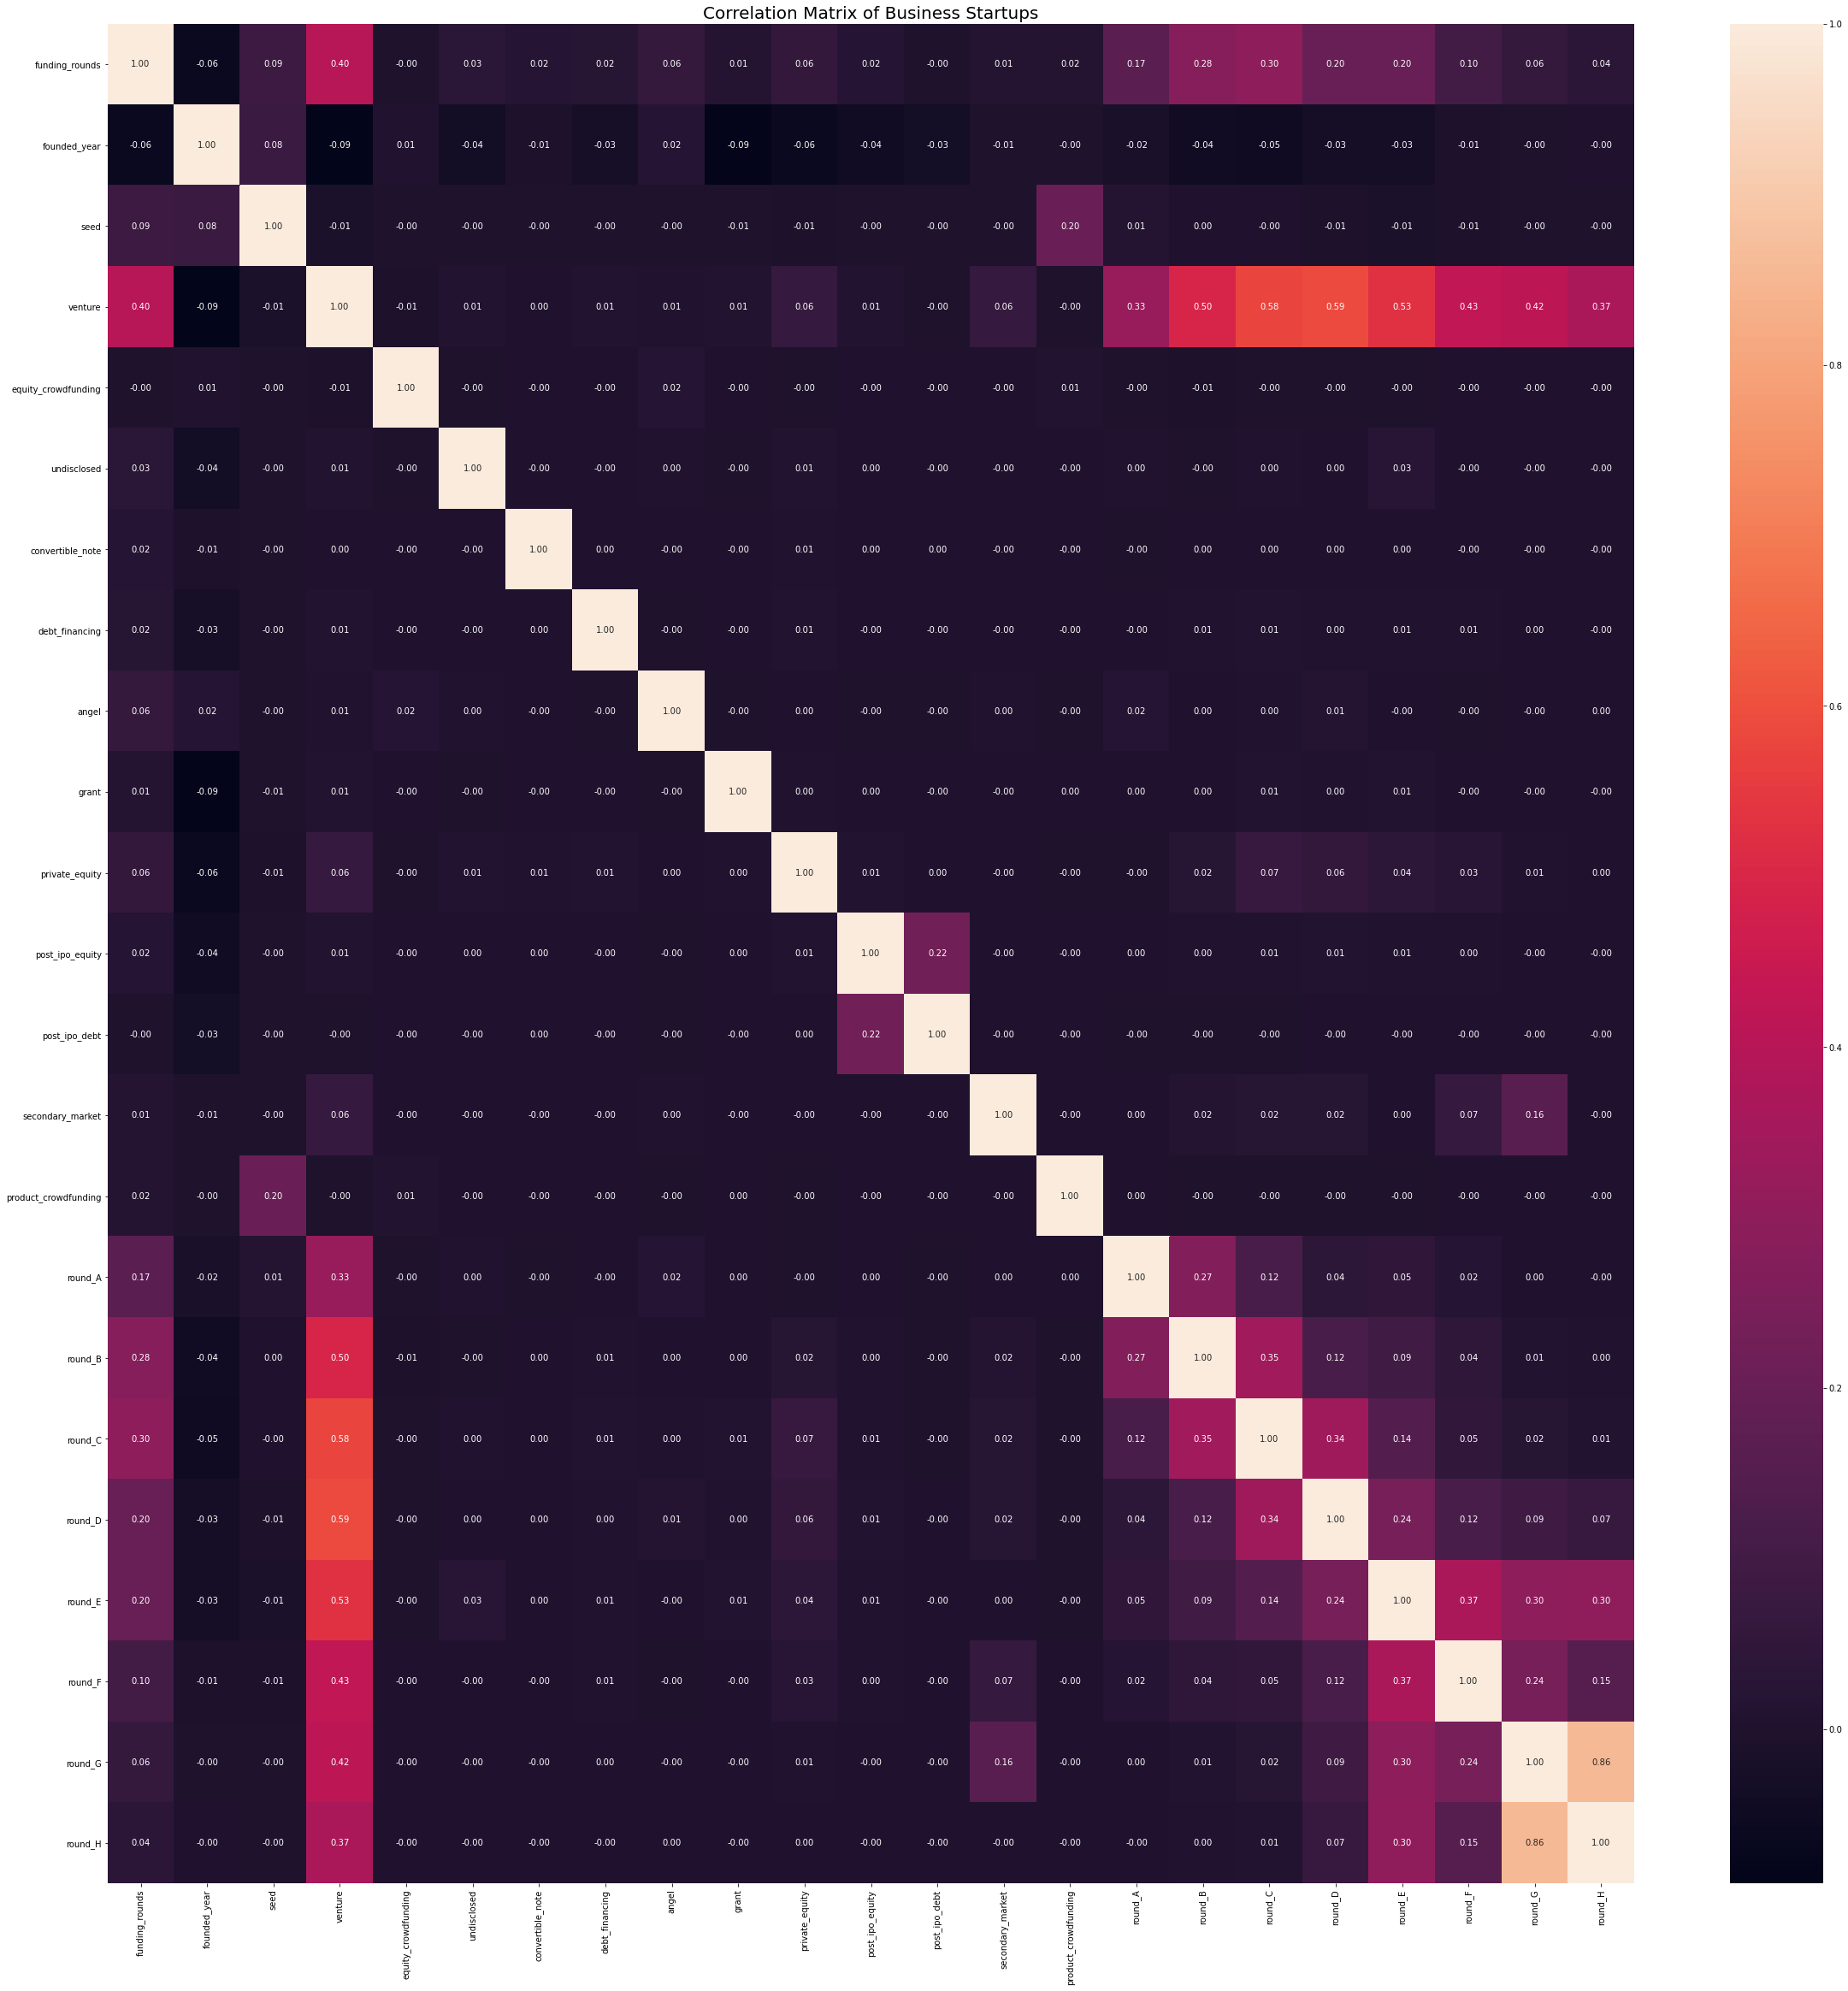

In [10]:
# Correlation Matrix

corr_matrix = biz_df.corr()
plt.figure(figsize = (40,40))
sns.heatmap(corr_matrix, annot = True, fmt = '0.2f')
plt.title("Correlation Matrix of Business Startups", fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Amount of startup by Markets')

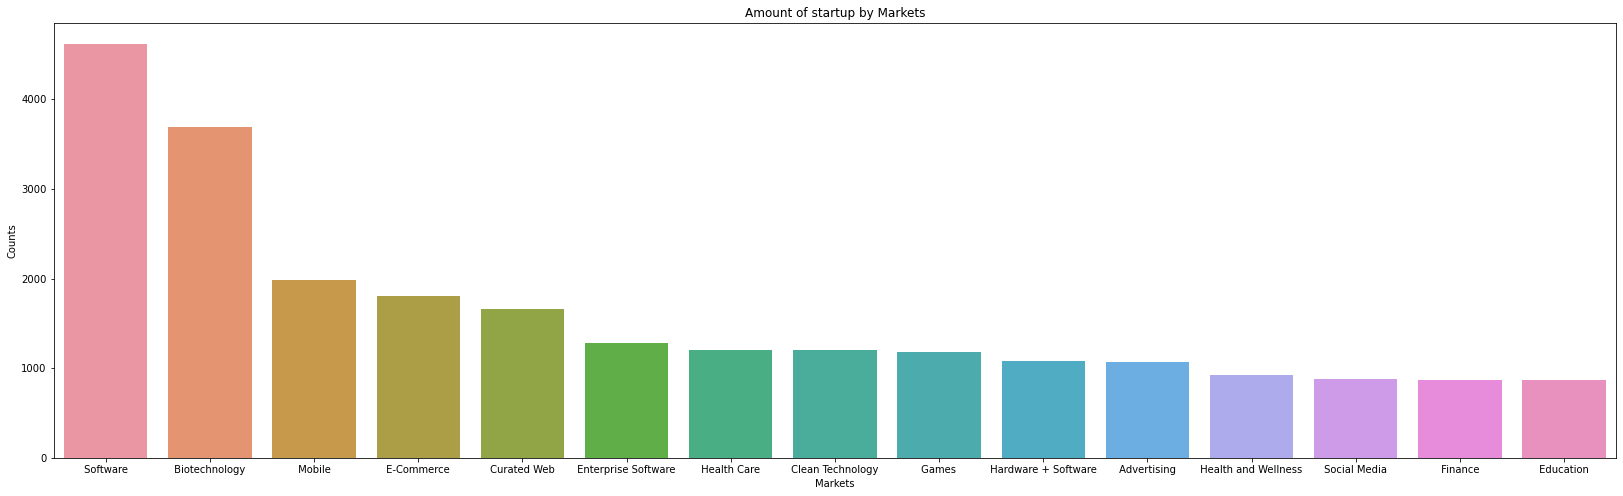

In [11]:
plt.figure(figsize=(28,8))
sns.countplot(x='market',data= biz_df, order=biz_df['market'].value_counts().iloc[:15].index)
plt.xlabel('Markets')
plt.ylabel('Counts')
plt.title('Amount of startup by Markets')

In [12]:
import plotly.graph_objects as go
fig = go.Figure(data = [ go.Pie(labels = ['Operating (operating)', 'Closed (closed)','Acquired (acquired)'], values = biz_df['status'].value_counts())
                       ])
fig.show()

#### 4.4 Data Wrangling

**Correcting: checking for unneccessary or incorrect data**

Since these contain mostly dates and individual values we will drop these columns

In [13]:
biz_df.drop(biz_df[biz_df['funding_total_usd'] == ' -   '].index,inplace=True)
biz_df['funding_total_usd'] = biz_df['funding_total_usd'].str.replace(",","")
biz_df.dropna( axis=0,subset=['funding_total_usd'],inplace = True)

In [14]:
#drop all rows that are businesses outside of the US
biz_df.drop(biz_df.loc[biz_df['country_code'] !='USA'].index, inplace=True)

In [15]:
#drop country column
biz_df= biz_df.drop(["country_code"], axis = "columns")

In [16]:
biz_df.isnull().sum()

permalink                  0
name                       0
homepage_url            1480
category_list           1127
market                  1130
funding_total_usd          0
status                   470
state_code                14
region                     0
city                      37
funding_rounds             0
founded_at              4422
founded_month           4480
founded_quarter         4480
founded_year            4480
first_funding_at           0
last_funding_at            0
seed                       0
venture                    0
equity_crowdfunding        0
undisclosed                0
convertible_note           0
debt_financing             0
angel                      0
grant                      0
private_equity             0
post_ipo_equity            0
post_ipo_debt              0
secondary_market           0
product_crowdfunding       0
round_A                    0
round_B                    0
round_C                    0
round_D                    0
round_E       

In [17]:
#drop the rows with null values
biz_df = biz_df.dropna()

#view to make sure all rows dropped
biz_df.isnull().sum()

permalink               0
name                    0
homepage_url            0
category_list           0
market                  0
funding_total_usd       0
status                  0
state_code              0
region                  0
city                    0
funding_rounds          0
founded_at              0
founded_month           0
founded_quarter         0
founded_year            0
first_funding_at        0
last_funding_at         0
seed                    0
venture                 0
equity_crowdfunding     0
undisclosed             0
convertible_note        0
debt_financing          0
angel                   0
grant                   0
private_equity          0
post_ipo_equity         0
post_ipo_debt           0
secondary_market        0
product_crowdfunding    0
round_A                 0
round_B                 0
round_C                 0
round_D                 0
round_E                 0
round_F                 0
round_G                 0
round_H                 0
dtype: int64

In [18]:
# generate a table of those culprit rows which are duplicated:
dups = biz_df.groupby(biz_df.columns.tolist()).size().reset_index().rename(columns={0:'count'})

# sum the final col of that table, and subtract the number of culprits:
dups['count'].sum() - dups.shape[0]

0

In [19]:
Q1 = biz_df.quantile(0.25)
Q3 = biz_df.quantile(0.75)
IQR = Q3 - Q1

#find upper and lower limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

#find amount of outliers 
((biz_df < (Q1 - 1.5 * IQR)) |(biz_df > (Q3 + 1.5 * IQR))).sum()

angel                   1346
category_list              0
city                       0
convertible_note         357
debt_financing          2829
equity_crowdfunding      238
first_funding_at           0
founded_at                 0
founded_month              0
founded_quarter            0
founded_year             903
funding_rounds           483
funding_total_usd          0
grant                    457
homepage_url               0
last_funding_at            0
market                     0
name                       0
permalink                  0
post_ipo_debt             36
post_ipo_equity          111
private_equity           691
product_crowdfunding      80
region                     0
round_A                 3564
round_B                 3274
round_C                 1891
round_D                  922
round_E                  387
round_F                  129
round_G                   23
round_H                    1
secondary_market          11
seed                    3796
state_code    

In [20]:
biz_df = biz_df[~((biz_df < (Q1 - 1.5 * IQR)) |(biz_df > (Q3 + 1.5 * IQR))).any(axis=1)]
biz_df.shape

(5067, 38)

**Completing: find and fill in missing values**

There are no missing values to be filled in this dataset, there were too many missing values they needed to be dropped instead

**Creating: Feature Engineering**

In [21]:
biz_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5067 entries, 17 to 49425
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             5067 non-null   object 
 1   name                  5067 non-null   object 
 2   homepage_url          5067 non-null   object 
 3   category_list         5067 non-null   object 
 4   market                5067 non-null   object 
 5   funding_total_usd     5067 non-null   object 
 6   status                5067 non-null   object 
 7   state_code            5067 non-null   object 
 8   region                5067 non-null   object 
 9   city                  5067 non-null   object 
 10  funding_rounds        5067 non-null   float64
 11  founded_at            5067 non-null   object 
 12  founded_month         5067 non-null   object 
 13  founded_quarter       5067 non-null   object 
 14  founded_year          5067 non-null   float64
 15  first_funding_at   

In [22]:
totalmoney = biz_df.groupby(['market']).sum()

topmarkets= pd.DataFrame({'market':biz_df['market'].value_counts().iloc[:15].index})

largem=biz_df.merge(topmarkets,how='inner',on='market')

biz_df=biz_df.merge(topmarkets,how='inner',on='market')

topmarkets=topmarkets.merge(totalmoney,how='inner', on='market')

biz_df.drop(columns=['homepage_url','state_code','permalink','name','category_list','region','city','secondary_market','founded_at','founded_quarter','founded_year','first_funding_at', 'last_funding_at','undisclosed', 'founded_month','round_A','round_B','round_C','round_D','round_E','round_F','round_H'],inplace=True)

In [23]:
biz_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2981 entries, 0 to 2980
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   market                2981 non-null   object 
 1   funding_total_usd     2981 non-null   object 
 2   status                2981 non-null   object 
 3   funding_rounds        2981 non-null   float64
 4   seed                  2981 non-null   float64
 5   venture               2981 non-null   float64
 6   equity_crowdfunding   2981 non-null   float64
 7   convertible_note      2981 non-null   float64
 8   debt_financing        2981 non-null   float64
 9   angel                 2981 non-null   float64
 10  grant                 2981 non-null   float64
 11  private_equity        2981 non-null   float64
 12  post_ipo_equity       2981 non-null   float64
 13  post_ipo_debt         2981 non-null   float64
 14  product_crowdfunding  2981 non-null   float64
 15  round_G              

**Converting: Changing Datatypes**

In [24]:
biz_df.dtypes

market                   object
funding_total_usd        object
status                   object
funding_rounds          float64
seed                    float64
venture                 float64
equity_crowdfunding     float64
convertible_note        float64
debt_financing          float64
angel                   float64
grant                   float64
private_equity          float64
post_ipo_equity         float64
post_ipo_debt           float64
product_crowdfunding    float64
round_G                 float64
dtype: object

In [25]:
# converting type of columns to 'category'
biz_df['status'] = biz_df['status'].astype('category')

# Assigning numerical values and storing in another column
biz_df['status'] = biz_df['status'].cat.codes
biz_df.head()



# converting type of columns to 'category'
biz_df['market'] = biz_df['market'].astype('category')

# Assigning numerical values and storing in another column
biz_df['market'] = biz_df['market'].cat.codes
biz_df.head()

biz_df["funding_total_usd"] = biz_df.funding_total_usd.astype(float)

## 5. Data Pre-processing 2 

* Split into test and train set
* Show Feature Importance

In [35]:
y = biz_df["status"]
X = biz_df.drop(labels = ["status"],axis = 1)

# Perform train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [27]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

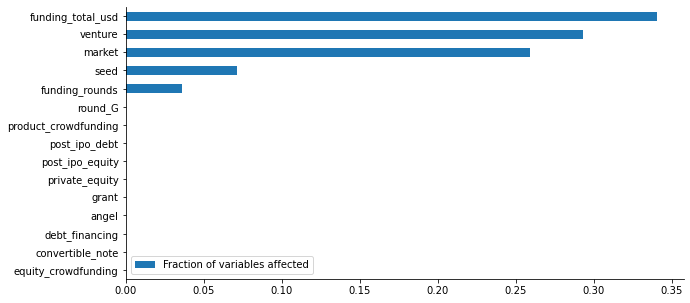

In [36]:
# Plot the feature importance

feat_scores= pd.DataFrame({"Fraction of variables affected" : rf.feature_importances_},index = X.columns)
feat_scores= feat_scores.sort_values(by = "Fraction of variables affected")
feat_scores.plot(kind = "barh", figsize = (10, 5))
sns.despine()

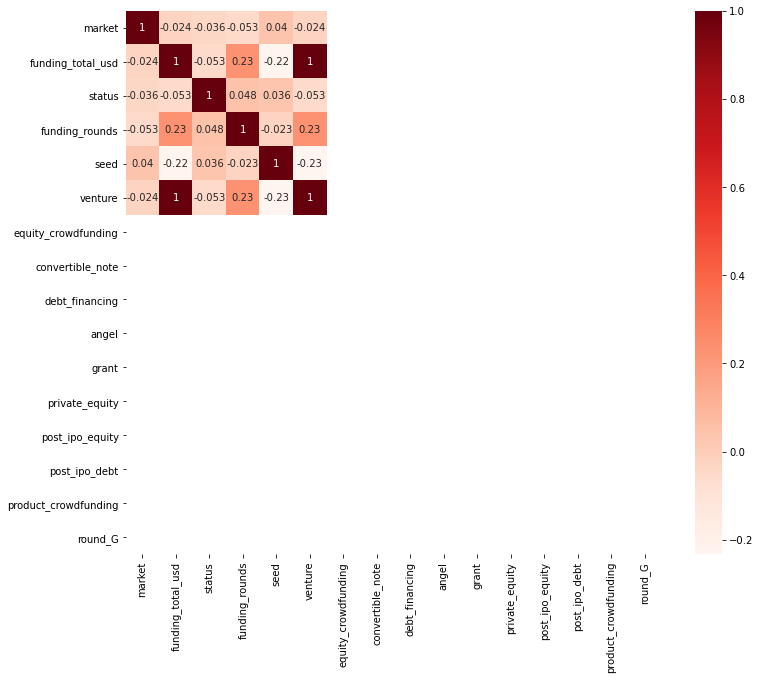

In [37]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = biz_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [39]:
import statsmodels.api as sm

#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const                   0.000000
market                  0.050788
funding_total_usd       0.227403
funding_rounds          0.001189
seed                    0.185588
venture                 0.178623
equity_crowdfunding          NaN
convertible_note             NaN
debt_financing               NaN
angel                        NaN
grant                        NaN
private_equity               NaN
post_ipo_equity              NaN
post_ipo_debt                NaN
product_crowdfunding         NaN
round_G                      NaN
dtype: float64

In [40]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['funding_rounds', 'venture', 'equity_crowdfunding', 'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 'post_ipo_debt', 'product_crowdfunding', 'round_G']


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True False False False False False False False
 False  True  True]
[1 1 1 1 1 9 8 7 6 5 4 3 2 1 1]


In [46]:
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 4
Score with 4 features: 0.003584


In [47]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['market', 'funding_total_usd', 'funding_rounds', 'seed', 'venture',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'round_G'],
      dtype='object')


## 6. Conclusion and Final Thoughts